In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [1]:
from sklearn.datasets import load_boston

In [6]:
dataset = load_boston()

In [54]:
print(dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [96]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['$$$'] = dataset.target
df.shape

(506, 14)

In [97]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,$$$
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [98]:
corr = df.corr(method='pearson')
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,$$$
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


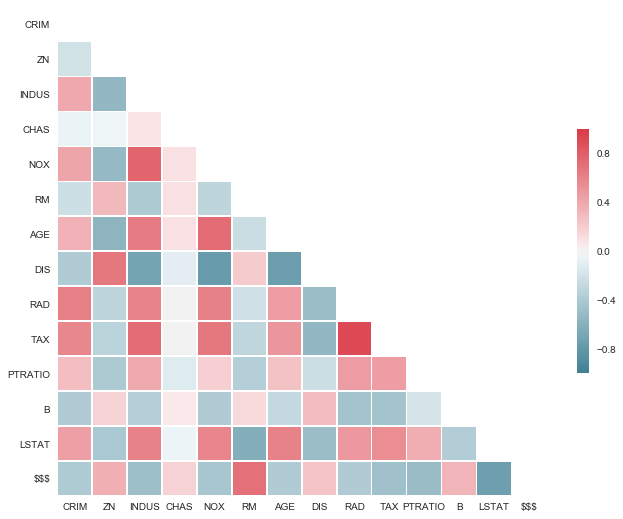

In [99]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1.0, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [101]:
pearson = df.corr(method='pearson')
# assume target attr is the last, then remove corr with itself
corr_with_target = pearson.iloc[-1][:-1]
# attributes sorted from the most predictive
predictivity = corr_with_target.sort_values(ascending=False)
predictivity

RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.385832
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: $$$, dtype: float64

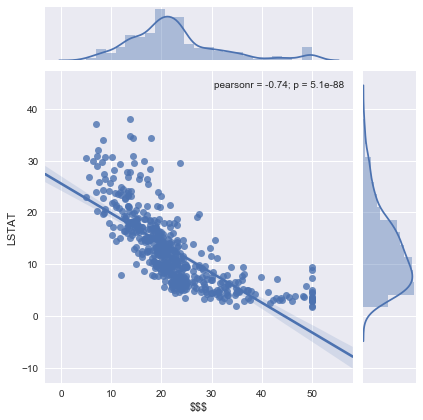

In [122]:
x, y = df['$$$'], df['LSTAT']
# or via jointplot (with histograms aside):
sns.jointplot(x, y, kind='reg')

In [116]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', '$$$'],
      dtype='object')

AttributeError: module 'seaborn' has no attribute 'show'

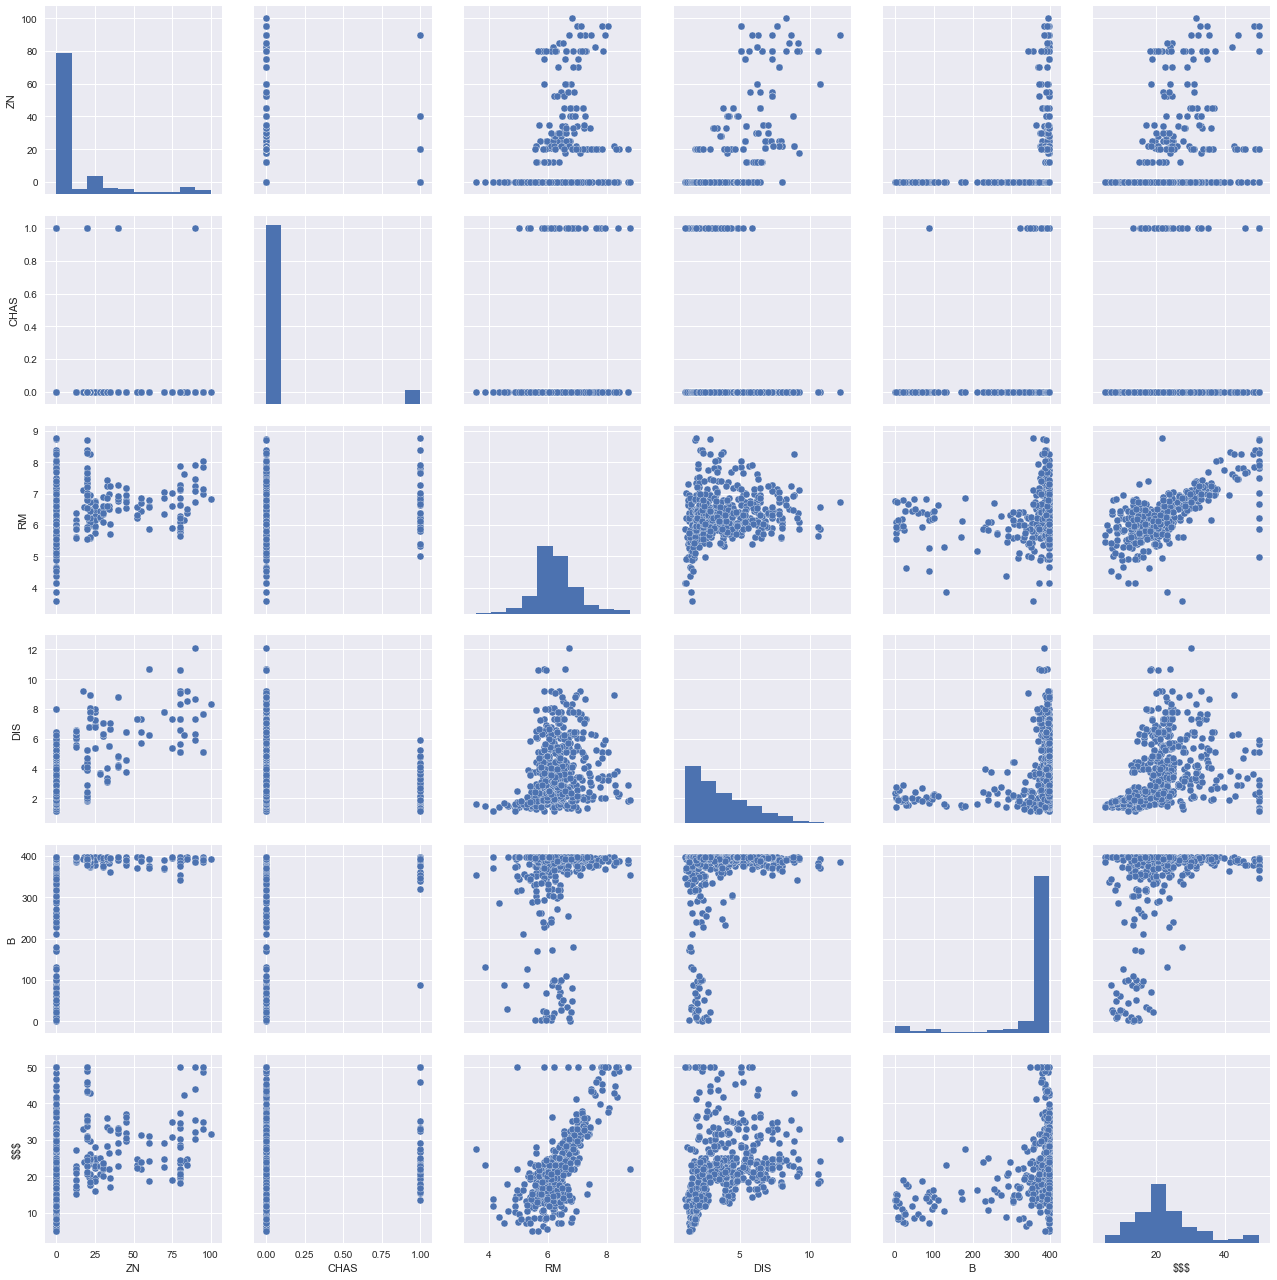

In [117]:
sns.pairplot(df[['ZN', 'CHAS', 'RM', 'DIS', 'B', '$$$']], size=3.0)
sns.show()

AttributeError: module 'seaborn' has no attribute 'show'

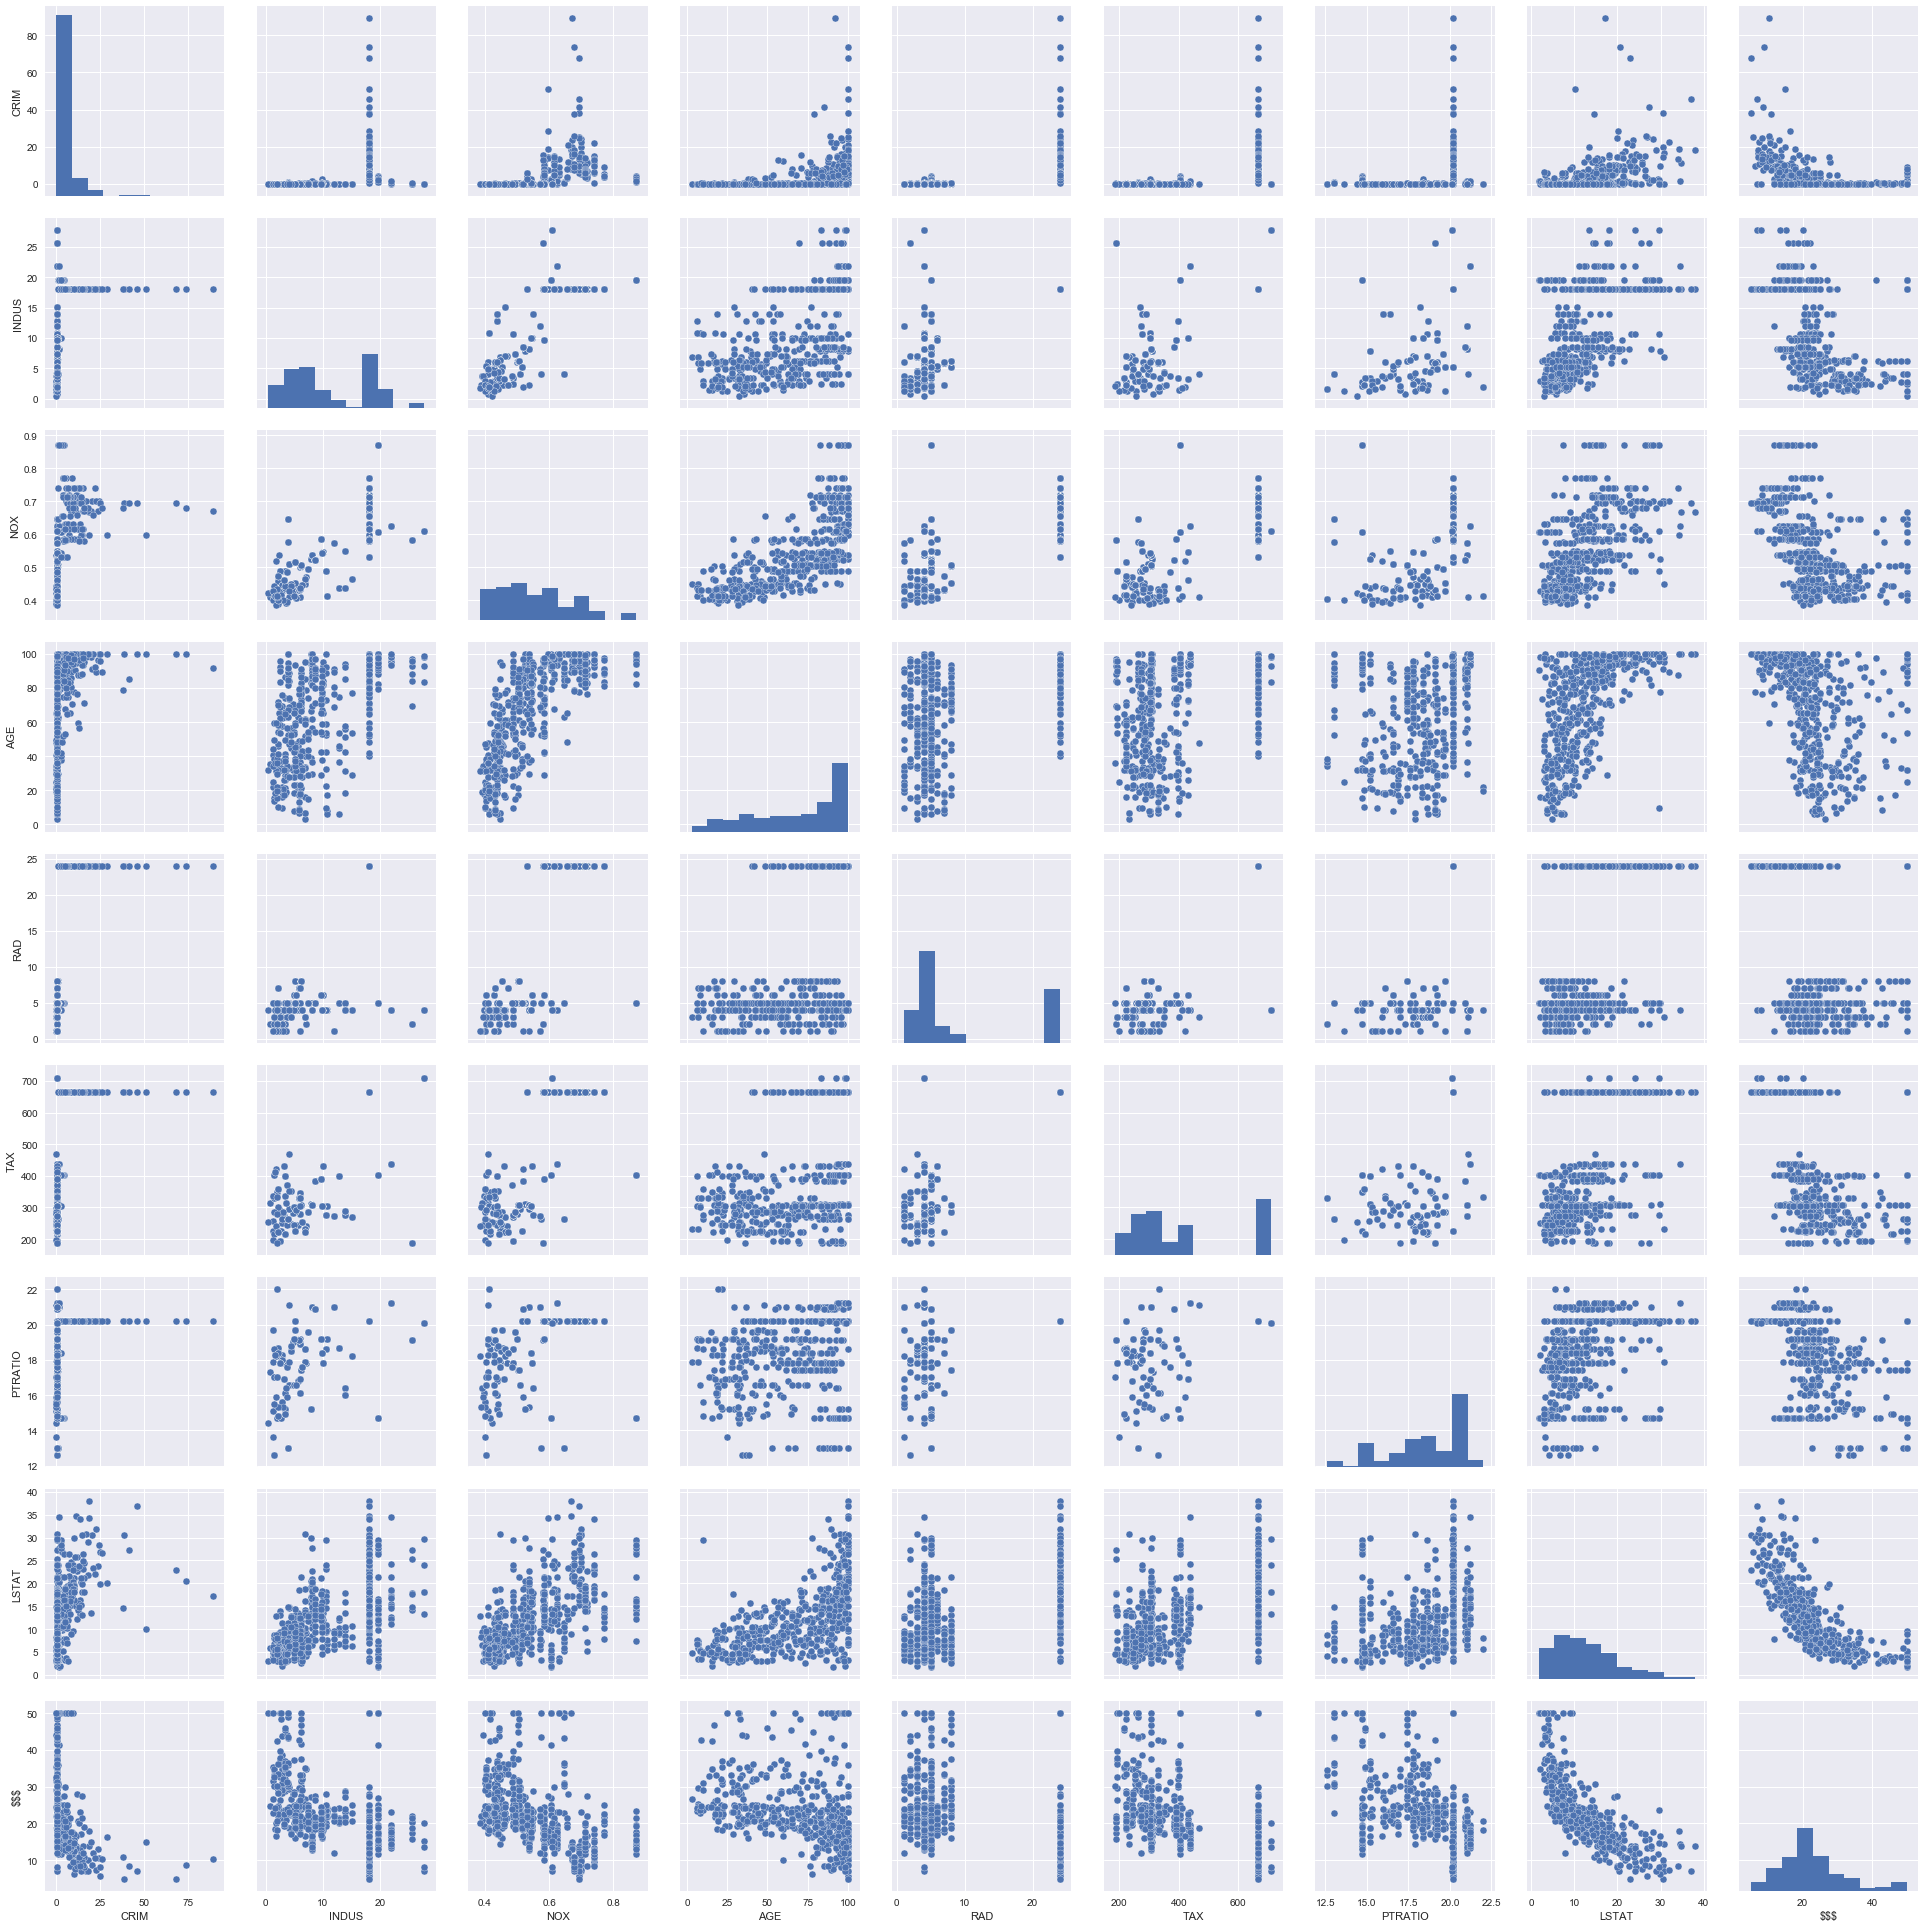

In [118]:
sns.pairplot(df[['CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', '$$$']], size=3.0)
sns.show()

In [91]:
df = df.drop("$$$", axis=1)

In [10]:
from xgboost import XGBRegressor

In [23]:
X = df
y = dataset.target

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
model = XGBRegressor()

In [27]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [39]:
y_pred = model.predict(X_test)

In [36]:
import numpy as np

In [40]:
np.round((y_pred - y_test) / y_test * 100, 1)

array([ -0.5,  -2.4,  20.1,   0.8,   7.2,  11.9,   1.6,   0.2,   6.1,
        26.8,  -5.2,  -3.4,  25.8,   1.3,  11.7, -19.4,   2. , -10.9,
        -8.4,  15.2,  -4.2, -15.4,  10.4, -10.3,  11.6,  17.6,  10.3,
        -5.9,  -8.3,  17.2, -12.2,  -1.9,  49.9,  -3.5, -23.2, -11.5,
        -1.6,   1. , -11.4,   0.4, -10.3,   4.1, -10.8,  21.3,  -1.9,
         1.5,  23.3,  -2.6, -11.7,  14.7,   9.1,   3.3,   8.1,  -6.7,
        12.9,   1.9, -15.2,  10. ,  -7.8,  -2.8, -10.5,  -0.4,   3. ,
         2.9,   3. ,  -8.8,  13.6,  -6.2,  -3.7,  14. ,   8.9,  18.9,
        -3.4,  -3.1,   7.9,  52.1,   3.5,  -7.4,   4.8,  89.2,   4.6,
       -28.9, -11.5,  -0.7,   3.8,  -7.4,  -0. ,  -5.9,  -1.8,  -1.2,
        -4. , -14.4,   0.4,  10.1,  -7.1, -13. , -30.7, -37.6,  25.5,
       -32.8,  -8.5,   7.8,  13.8,   2.6,   0.2, -12.7,   8.7,   8.6,
        -1.3,  -2.7,   0.1, -53.4,   5.8, -32.3,   2.3,  35.5,   4.2,
        11.7,  -0.8,  -0.5,  12.8,  -2. ,  -7.7,   9.2,  -6. ,   9.4,
        -4.9,  11.7,

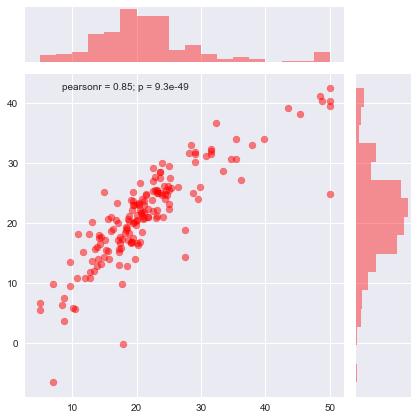

In [129]:
sns.jointplot(y_test, y_pred, alpha=0.5, color='r')

In [41]:
from sklearn.metrics import mean_absolute_error

In [43]:
mean_absolute_error(y_test, y_pred)

2.0391318766656754

In [44]:
from sklearn.linear_model import LinearRegression

In [50]:
model = LinearRegression()

In [51]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
y_pred = model.predict(X_test)

In [53]:
mean_absolute_error(y_test, y_pred)

3.1512878365884047